## Exercises

- Show (numerically) that the four filter matrices constitute a **unitary transformation**.
- Use the dilation and translation relationships to obtain, for a given scaling/wavelet function, the corresponding function at the next **finer scale** (larger $n$).
- Use the two-scale relationship to verify that the scaling function obtained by translation/dilation can also be obtained by linear transformation of the scaling&wavelet functions at the next **coarser scale** (smaller $n$).

## Exercises

1. Show (numerically) that the four filter matrices constitute a **unitary transformation**.
2. Use the dilation and translation relationships to obtain, for a given scaling/wavelet function, the corresponding function at the next **finer scale** (larger $n$).
3. Use the two-scale relationship to verify that the scaling function obtained by translation/dilation can also be obtained by linear transformation of the scaling&wavelet functions at the next **coarser scale** (smaller $n$).

### Answer 1

In [1]:
import sys, struct
import numpy as np

# Gets one of the four filter matrices
# Basis: L (legendre) or I (interpolating)
# Type: H or G
# Flag: 0 or 1
# n: from 1 to 11
def getfilter(basis = "L", ftype = "H", flag = 0, n = 4):
    order = n - 1
    name = "../mwfilters/" + basis + "_" + ftype + "0_" + str(order)
    filterFile = open(name, 'rb')
    filterData = filterFile.read()
    filterList = []
    for i in range((n)*(n)):
        rstart = i * 8
        rend = (i + 1) * 8
        filterList.append(struct.unpack_from("d",filterData[rstart:rend]))
    filterArray = np.array(filterList)
    filterMatrix = np.ndarray((n, n),buffer=filterArray)
    if (flag == 1):
        if ftype == "G" and n%2 != 0:
            sign_np = -1
        else:
            sign_np = 1
        for i in range(n):
            for j in range(n):
                sign_ij = 1
                if (((i+j)%2) == 0):
                    sign_ij = -1
                sign = sign_ij * sign_np
                filterMatrix[i,j] *= sign
    return filterMatrix

#filters for a third order (k+1=4) Legendre basis

basis = "L" # alternative "I" for interpolating
n = 4 # n = k+1  (avaliable up to k=10)
H0 = getfilter(basis, "H", 0, n)
H1 = getfilter(basis, "H", 1, n)
G0 = getfilter(basis, "G", 0, n)
G1 = getfilter(basis, "G", 1, n)
print("H0:\n",H0)
print("H1:\n",H1)
print("G0:\n",G0)
print("G1:\n",G1)

T = np.ndarray((2*n,2*n))
T[:n,:n]=H0
T[:n,n:]=H1
T[n:,:n]=G0
T[n:,n:]=G1
print("T = V0+W0<-V1 transform:\n",T)
print("T * T^t should be identity:\n",np.einsum("ij,kj->ik",T,T))

H0:
 [[ 7.07106781e-01  0.00000000e+00  4.88535468e-77  0.00000000e+00]
 [-6.12372436e-01  3.53553391e-01 -4.48460293e-77  2.23275976e-77]
 [ 9.16004002e-78 -6.84653197e-01  1.76776695e-01 -3.96935068e-77]
 [ 2.33853587e-01  4.05046294e-01 -5.22912517e-01  8.83883476e-02]]
H1:
 [[-7.07106781e-01  0.00000000e+00 -4.88535468e-77  0.00000000e+00]
 [-6.12372436e-01 -3.53553391e-01 -4.48460293e-77 -2.23275976e-77]
 [-9.16004002e-78 -6.84653197e-01 -1.76776695e-01 -3.96935068e-77]
 [ 2.33853587e-01 -4.05046294e-01 -5.22912517e-01 -8.83883476e-02]]
G0:
 [[ 6.54942862e-76 -1.53392998e-01 -5.94088526e-01  3.51467512e-01]
 [-1.54303350e-01 -2.67261242e-01 -1.72516390e-01  6.12372436e-01]
 [-1.98162199e-75 -8.78668779e-02 -3.40306955e-01 -6.13571991e-01]
 [ 2.15645487e-01  3.73508940e-01  4.43622131e-01  3.42326598e-01]]
G1:
 [[-6.54942862e-76 -1.53392998e-01  5.94088526e-01  3.51467512e-01]
 [-1.54303350e-01  2.67261242e-01 -1.72516390e-01 -6.12372436e-01]
 [ 1.98162199e-75 -8.78668779e-02  3.40

## Answer 2

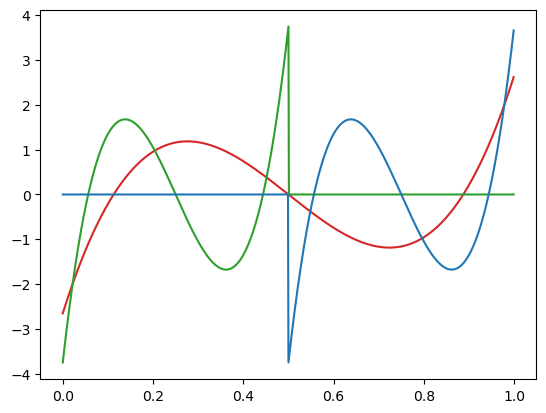

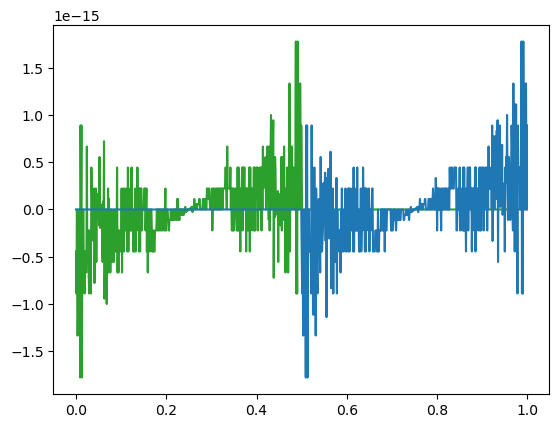

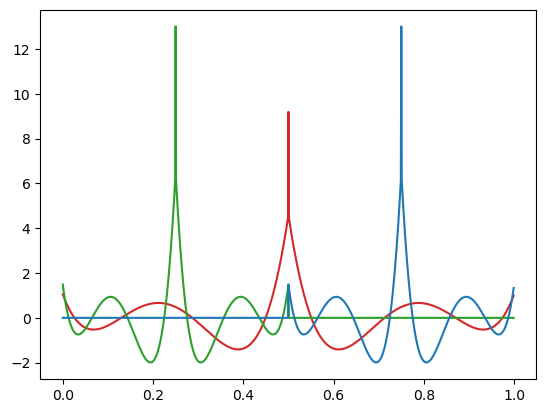

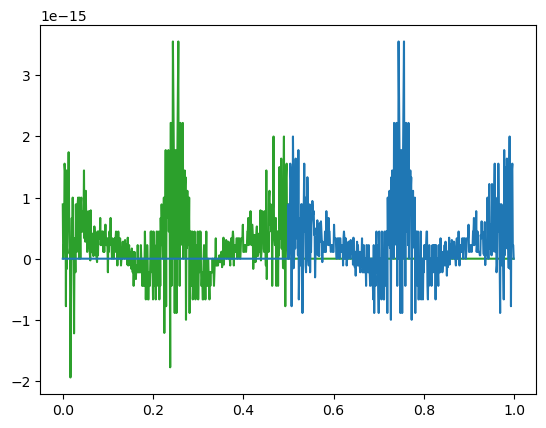

In [2]:
from vampyr import LegendreBasis, InterpolatingBasis
import matplotlib.pyplot as plt
import numpy as np

# Create Legendre basis of order 4
legendre_k = LegendreBasis(order=n)

scaling_basis = legendre_k.scaling

x_vec = np.arange(0.0, 1.0, 0.001)

# take sf/wv at scale n , make fn at scale n+1
def make_dilated(fn):
    def dilated(xarr):
        # VaMPYR functions take float[1]
        x = xarr[0]
        return np.sqrt(2) * fn([2*x])

    return dilated

# take sf/wv at scale n , make another fn at scale n by translation
def make_translated(fn, n, l):
    def translated(xarr):
        # VaMPYR functions take float[1]
        x = xarr[0]
        return fn([x-l/pow(2,n)])

    return translated

    
#########
### SF 
#########

sf0 = scaling_basis(i=3, l=0, n=0)      # scale-0 SF
sf10_ref = scaling_basis(i=3, l=0, n=1) # scale-1 SF provided by VaMPYR
sf11_ref = scaling_basis(i=3, l=1, n=1) # scale-1 SF provided by VaMPYR
sf10 = make_dilated(sf0)                # scale-1 SF we made
sf11 = make_translated(sf10, 1, 1)      # scale-1 SF we made

sf0_vec = [sf0([x]) for x in x_vec]
sf10_vec = [sf10([x]) for x in x_vec]
sf11_vec = [sf11([x]) for x in x_vec]
plt.plot(x_vec, sf0_vec, "tab:red") # scale-0 SF
plt.plot(x_vec, sf10_vec, "tab:green") # scale-1 SF we made
plt.plot(x_vec, sf11_vec, "tab:blue") # scale-1 SF we made

plt.show()

# validate scale-1 SFs
sf10_error_vec = [sf10([x]) - sf10_ref([x]) for x in x_vec]
sf11_error_vec = [sf11([x]) - sf11_ref([x]) for x in x_vec]
plt.plot(x_vec, sf10_error_vec, "tab:green") # errors in scale-1 SF we made
plt.plot(x_vec, sf11_error_vec, "tab:blue") # errors in scale-1 SF we made

plt.show()

#########
### WV 
#########
wavelet_basis = legendre_k.wavelet

wv0 = wavelet_basis(i=3, l=0, n=0)      # scale-0 WV
wv10_ref = wavelet_basis(i=3, l=0, n=1) # scale-1 WV provided by VaMPYR
wv11_ref = wavelet_basis(i=3, l=1, n=1) # scale-1 WV provided by VaMPYR
wv10 = make_dilated(wv0)                # scale-1 WV we made
wv11 = make_translated(wv10, 1, 1)      # scale-1 WV we made

wv0_vec = [wv0([x]) for x in x_vec]
wv10_vec = [wv10([x]) for x in x_vec]
wv11_vec = [wv11([x]) for x in x_vec]
plt.plot(x_vec, wv0_vec, "tab:red") # your projected function
plt.plot(x_vec, wv10_vec, "tab:green") # your projected function
plt.plot(x_vec, wv11_vec, "tab:blue") # your projected function

plt.show()

# validate scale-1 WVs
wv10_error_vec = [wv10([x]) - wv10_ref([x]) for x in x_vec]
wv11_error_vec = [wv11([x]) - wv11_ref([x]) for x in x_vec]
plt.plot(x_vec, wv10_error_vec, "tab:green") # errors in scale-1 SF we made
plt.plot(x_vec, wv11_error_vec, "tab:blue") # errors in scale-1 SF we made

plt.show()

## Answer 3

__WARNING__ assume that Answer 1's cell has been loaded

[[-6.54942862e-76  2.23052590e-09 -4.21399537e-09  1.67740366e-09]
 [ 3.79080933e-11  1.91242439e-09  1.64411429e-10  4.30420555e-09]
 [ 1.98162199e-75  2.08064908e-09  4.86488633e-09 -1.07789644e-09]
 [ 4.31290977e-01 -7.47017880e-01  8.87244261e-01 -6.84653198e-01]]


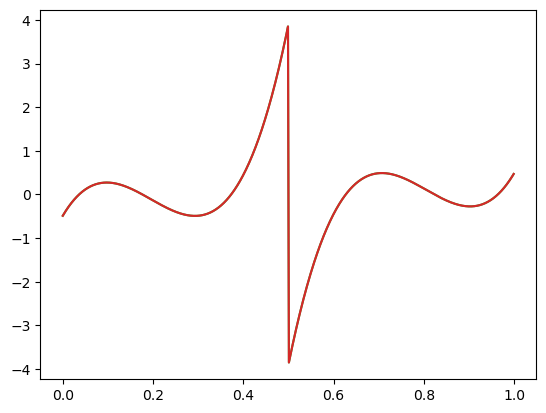

In [19]:
from vampyr import LegendreBasis, InterpolatingBasis
import matplotlib.pyplot as plt
import numpy as np

# Create Legendre basis of order n(=4)
legendre_k = LegendreBasis(order=n)

scaling_basis = legendre_k.scaling
wavelet_basis = legendre_k.wavelet

x_vec = np.arange(0.0, 1.0, 0.001)
npt = x_vec.size

sf00_values = np.ndarray((n, npt))
wv00_values = np.ndarray((n, npt))
sf10_values = np.ndarray((n, npt))
sf11_values = np.ndarray((n, npt))

sf00 = [scaling_basis(n=0, l=0, i=ii) for ii in range(0, n)]
sf10 = [scaling_basis(n=1, l=0, i=ii) for ii in range(0, n)]
sf11 = [scaling_basis(n=1, l=1, i=ii) for ii in range(0, n)]
wv00 = [wavelet_basis(n=0, l=0, i=ii) for ii in range(0, n)]

for ii in range(0, n):
    sf00_values[ii,:] = [sf00[ii]([x]) for x in x_vec]
    wv00_values[ii,:] = [wv00[ii]([x]) for x in x_vec]
    sf10_values[ii,:] = [sf10[ii]([x]) for x in x_vec]
    sf11_values[ii,:] = [sf11[ii]([x]) for x in x_vec]

# Something is off about VaMPYR:
# - H1 is negative of MADNESS' H1
# - more fine-grained phase differences in G matrices
sf00_values_vampyr = np.einsum("ij,jx->ix",H0,sf10_values) - np.einsum("ij,jx->ix",H1,sf11_values)
wv00_values_vampyr = np.einsum("ij,jx->ix",G0,sf10_values) - np.einsum("ij,jx->ix",G1,sf11_values)

#for ii in range(0, n):
#    plt.plot(x_vec, sf00_values_2sc[ii]-sf00_values[ii], "tab:green")
#plt.show()

#for ii in range(0, n):
#    plt.plot(x_vec, wv00_values[ii], "tab:blue")
#    plt.plot(x_vec, wv00_values_2sc[ii], "tab:green")
#plt.show()

# use MADNESS's two-scale coefficients
if n == 4:
#if False:
    H0_mad =  [[0.70710678,   0.00000000,   0.00000000,   0.00000000], 
               [-0.61237244,   0.35355339,   0.00000000,   0.00000000], 
               [0.00000000,  -0.68465320,   0.17677670,   0.00000000], 
               [0.23385359,   0.40504629,  -0.52291252,   0.08838835]]
    H1_mad = [[0.70710678,  -0.00000000,   0.00000000,  -0.00000000], 
              [0.61237244,   0.35355339,  -0.00000000,   0.00000000], 
              [0.00000000,   0.68465320,   0.17677670,  -0.00000000], 
              [-0.23385359,   0.40504629,   0.52291252,   0.08838835]]
    G0_mad = [[0.00000000,   0.15339300,   0.59408853,  -0.35146751], 
              [0.15430335,   0.26726124,   0.17251639,  -0.61237244], 
              [0.00000000,   0.08786688,   0.34030695,   0.61357199], 
              [0.21564549,   0.37350894,   0.44362213,   0.34232660]]
    G1_mad = [[0.00000000,  -0.15339300,   0.59408853,   0.35146751], 
              [-0.15430335,   0.26726124,  -0.17251639,  -0.61237244], 
              [0.00000000,  -0.08786688,   0.34030695,  -0.61357199], 
              [-0.21564549,   0.37350894,  -0.44362213,   0.34232660]]
    print(G1 - G1_mad)
    
    
    sf00_values_madness = np.einsum("ij,jx->ix",H0_mad,sf10_values) + np.einsum("ij,jx->ix",H1_mad,sf11_values)
    wv00_values_madness = np.einsum("ij,jx->ix",G0_mad,sf10_values) + np.einsum("ij,jx->ix",G1_mad,sf11_values)

    plt.plot(x_vec, wv00_values_vampyr[3], "tab:green")
    plt.plot(x_vec, wv00_values_madness[3], "tab:red")
#    for ii in range(0, n):
#        plt.plot(x_vec, sf00_values_2sc[ii]-sf00_values[ii], "tab:green")
#    plt.show()
#
#    # VaMPYR wavelet basis seems buggy, so print out wavelets obtained using MADNESS
#    for ii in range(0, n):
#        plt.plot(x_vec, wv00_values_2sc[ii], "tab:blue")
#    plt.show()
